In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


# Downloads CIFAR-10 automatically and loads it into memory
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 784s 5us/step


Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


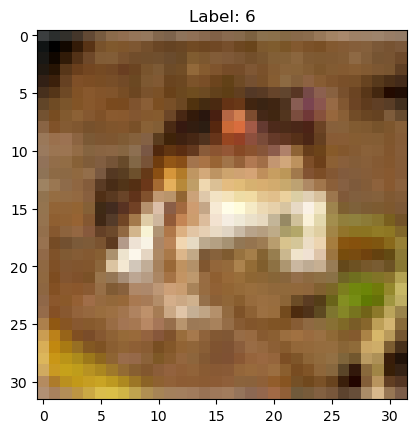

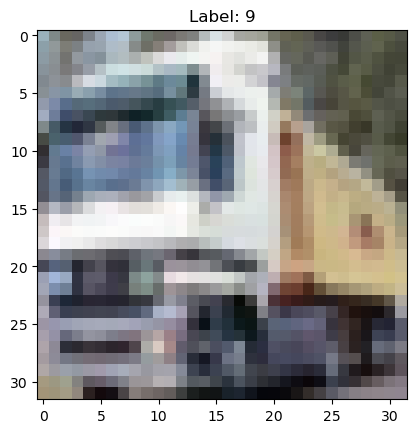

In [50]:
from skimage import io, util

print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

img = x_train[0]
img1 = x_train[1]

# Show it
plt.imshow(img)
plt.title(f"Label: {y_train[0][0]}")
plt.show()
# Show it
plt.imshow(img1)
plt.title(f"Label: {y_train[1][0]}")
plt.show()

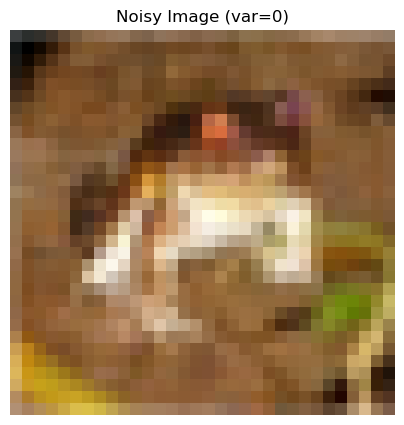

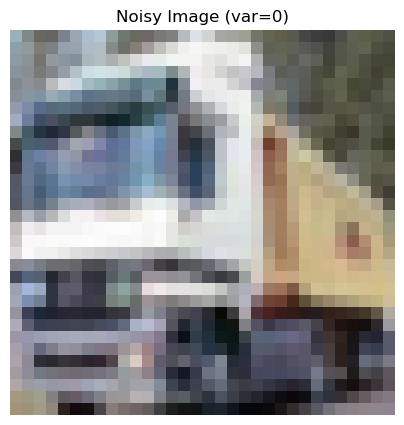

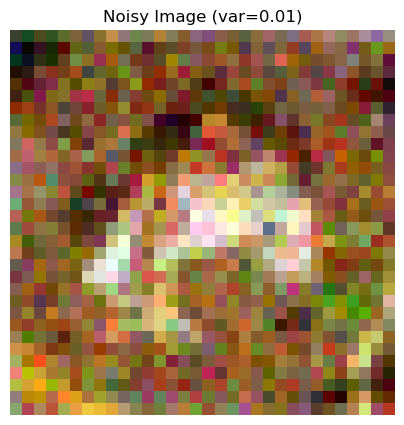

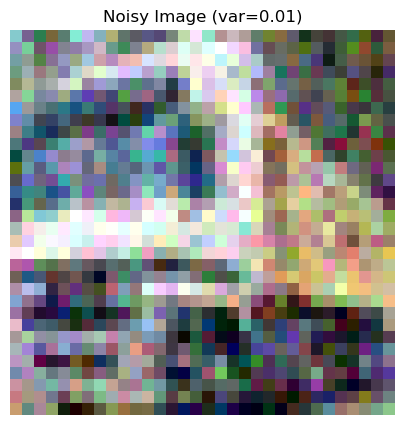

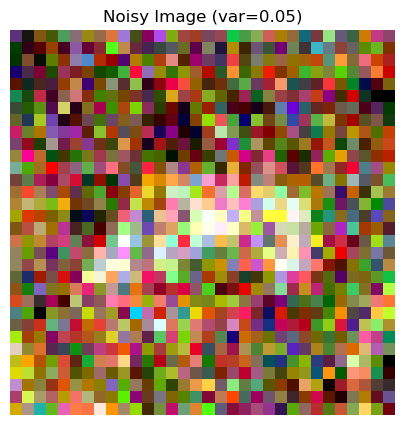

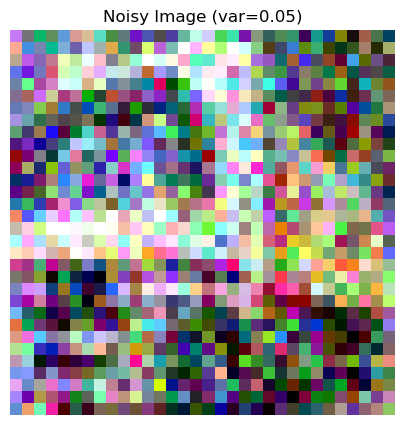

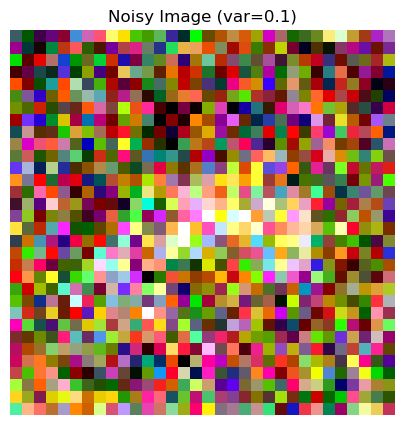

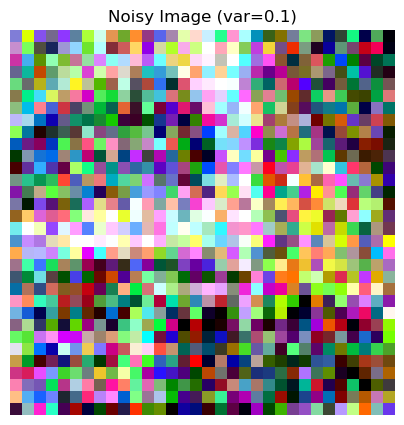

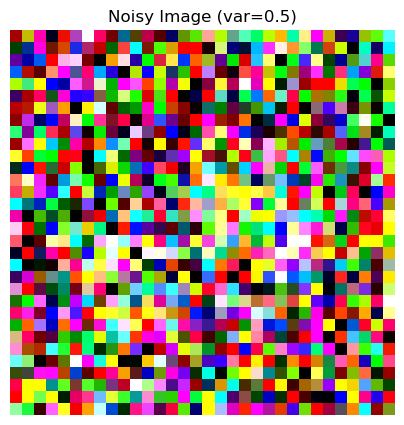

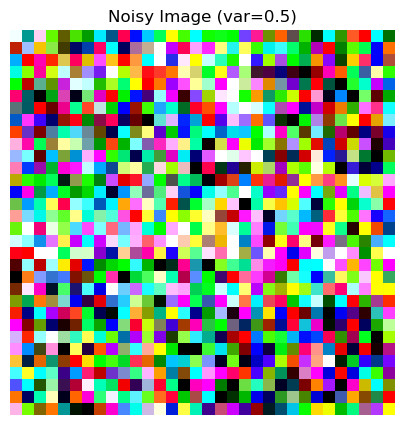

In [53]:
# Variances for Gaussian noise
v = [0, 0.01, 0.05, 0.1, 0.5]

# Store noisy images in a list
noisy_imgs = []
noisy1_imgs = []

for var in v:
    noisy = util.random_noise(img, mode='gaussian', var=var)
    noisy1 = util.random_noise(img1, mode='gaussian', var=var)
    noisy_imgs.append(noisy)
    noisy1_imgs.append(noisy1)
    plt.figure(figsize=(5, 5))
    plt.imshow(noisy)
    plt.title(f"Noisy Image (var={var})")
    plt.axis("off")
    plt.show()
    io.imsave(f"noisy_{var}.jpg", (noisy * 255).astype("uint8"))
    plt.figure(figsize=(5, 5))
    plt.imshow(noisy1)
    plt.title(f"Noisy Image (var={var})")
    plt.axis("off")
    plt.show()
    io.imsave(f"noisy1_{var}.jpg", (noisy1 * 255).astype("uint8"))

In [70]:
from brisque import BRISQUE
import cv2

# Create BRISQUE object

brisque = BRISQUE()

var = ['noisy_0.jpg', 'noisy_0.01.jpg', 'noisy_0.05.jpg', 'noisy_0.1.jpg', 'noisy_0.5.jpg']
var1 = ['noisy1_0.jpg', 'noisy1_0.01.jpg', 'noisy1_0.05.jpg', 'noisy1_0.1.jpg', 'noisy1_0.5.jpg']


for fname in var:
    img = cv2.imread(fname)  # Load as NumPy array
    score = brisque.score(img)
    print(fname, "BRISQUE score:", score)
    
for fname in var1:
    img = cv2.imread(fname)  # Load as NumPy array
    score = brisque.score(img)
    print(fname, "BRISQUE score:", score)

noisy_0.jpg BRISQUE score: 22.56594378548087
noisy_0.01.jpg BRISQUE score: 58.15108608419595
noisy_0.05.jpg BRISQUE score: 79.96082539128403
noisy_0.1.jpg BRISQUE score: 86.41001237875523
noisy_0.5.jpg BRISQUE score: 94.02044216024203
noisy1_0.jpg BRISQUE score: 68.05607325327466
noisy1_0.01.jpg BRISQUE score: 71.31495502137383
noisy1_0.05.jpg BRISQUE score: 91.23467252213115
noisy1_0.1.jpg BRISQUE score: 104.83656304343069
noisy1_0.5.jpg BRISQUE score: 96.01859096465611
